<a href="https://colab.research.google.com/github/IlyaTsibulin/Pandas-Seaborn/blob/main/%D0%97%D0%B0%D1%87%D0%B5%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2%D0%B0%D0%BC_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_Pandas_%D0%B8_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Роснефть - 2021.csv', sep=';')

print(df.columns)

Index(['<TICKER>', '<PER>', '<DATE>', '<TIME>', '<OPEN>', '<HIGH>', '<LOW>',
       '<CLOSE>', '<VOL>'],
      dtype='object')


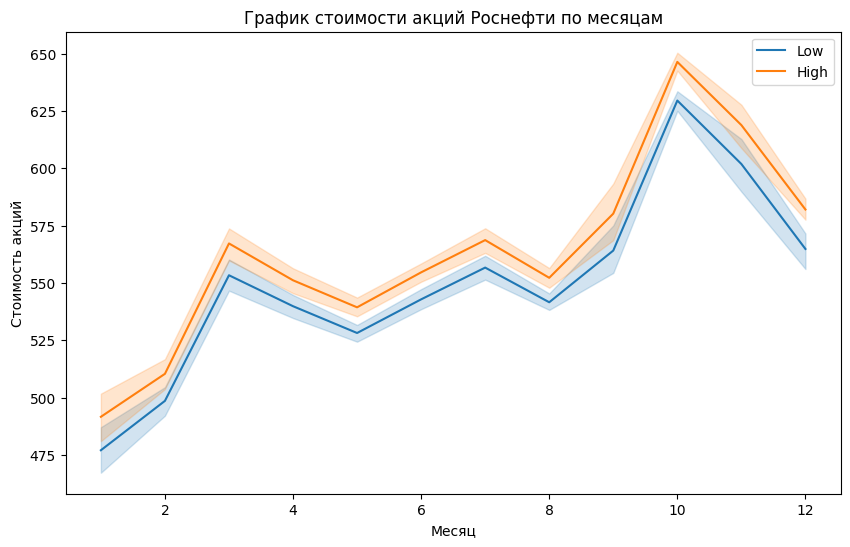

In [ ]:
df['DATE'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')

df['MONTH'] = df['DATE'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(x='MONTH', y='<LOW>', data=df, label='Low')
sns.lineplot(x='MONTH', y='<HIGH>', data=df, label='High')

plt.title('График стоимости акций Роснефти по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Стоимость акций')
plt.legend()
plt.show()


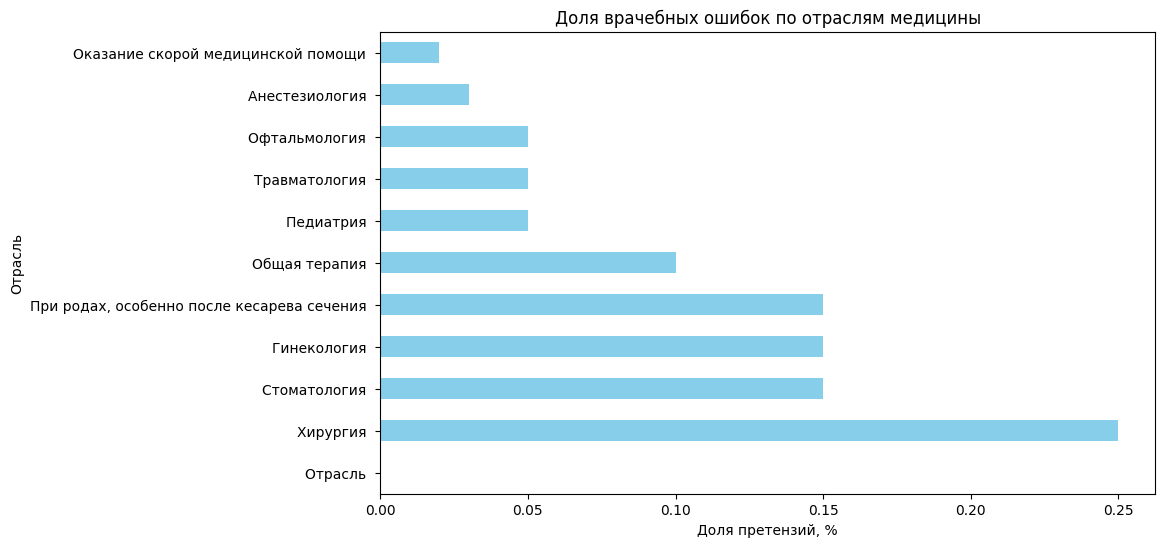

In [ ]:
df = pd.read_excel('Доля врачебных ошибок по секторам медицины.xlsx', skiprows=1)

df.columns = ['Отрасль', 'Количество претензий']

df['Количество претензий'] = pd.to_numeric(df['Количество претензий'], errors='coerce')

df = df.dropna(subset=['Отрасль'])

df.set_index('Отрасль').plot(kind='barh', legend=False, color='skyblue', figsize=(10, 6))
plt.title('Доля врачебных ошибок по отраслям медицины')
plt.xlabel('Доля претензий, %')
plt.ylabel('Отрасль')
plt.show()

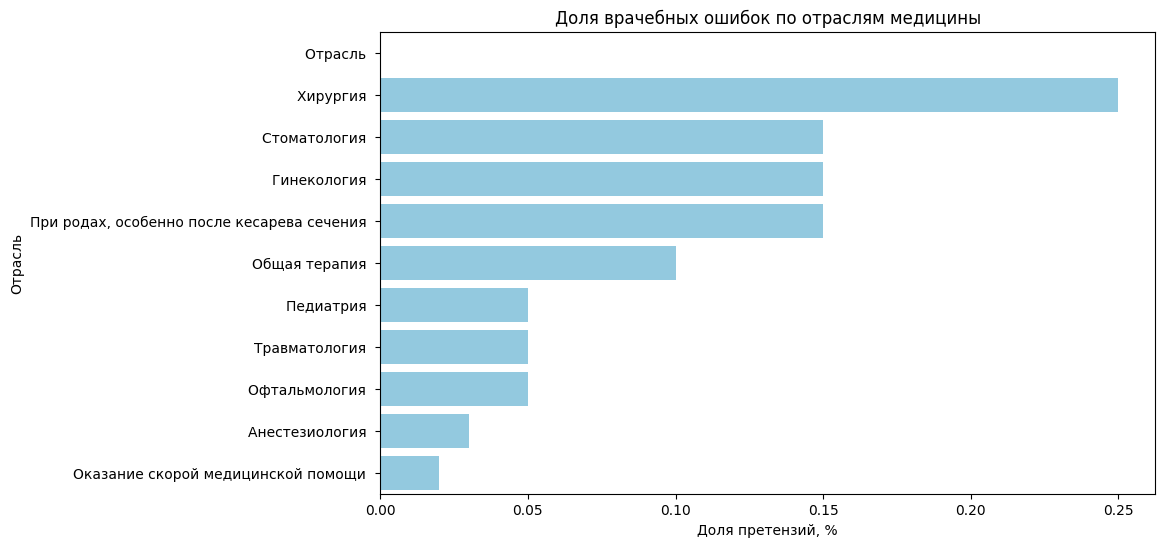

In [ ]:
df = pd.read_excel('Доля врачебных ошибок по секторам медицины.xlsx', skiprows=1)

df.columns = ['Отрасль', 'Количество претензий']

df['Количество претензий'] = pd.to_numeric(df['Количество претензий'], errors='coerce')

df = df.dropna(subset=['Отрасль'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Количество претензий', y='Отрасль', data=df, color='skyblue')
plt.title('Доля врачебных ошибок по отраслям медицины')
plt.xlabel('Доля претензий, %')
plt.ylabel('Отрасль')
plt.show()

        Страна   2016   2017   2018   2019   2020
0    Австралия  1.016  1.013  1.006  0.999   1.01
1      Австрия  0.398  0.394  0.391  0.386  0.373
2  Азербайджан  0.121  0.114  0.112  0.112  0.111
3      Албания   0.03  0.031  0.031  0.031  0.031
4        Алжир  0.408  0.399   0.39  0.383  0.373


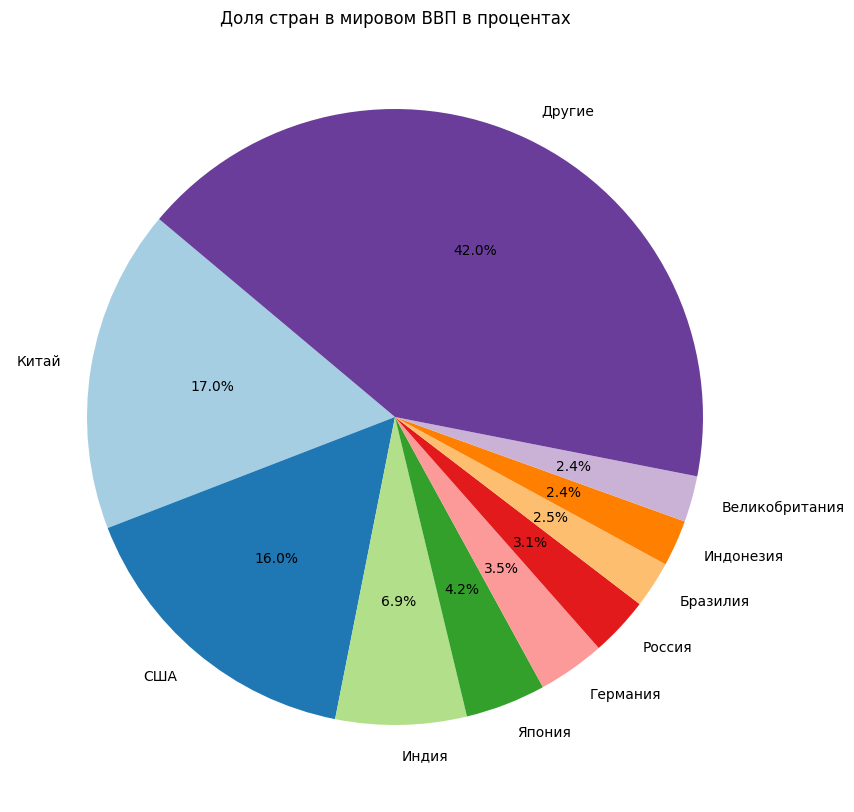

In [ ]:
df = pd.read_excel('ВВП стран мира.xlsx', skiprows=3)

print(df.head())

df = df.dropna()

for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()

df['Сумма'] = df.iloc[:, 1:].sum(axis=1)

top_countries = df.sort_values(by='Сумма', ascending=False).head(9)

other_countries = pd.DataFrame({'Страна': ['Другие'], 'Сумма': [df['Сумма'].sum() - top_countries['Сумма'].sum()]})

final_df = pd.concat([top_countries, other_countries])

plt.figure(figsize=(10, 10))
plt.pie(final_df['Сумма'], labels=final_df['Страна'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Доля стран в мировом ВВП в процентах')
plt.show()